In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline
import requests 

In [330]:
import warnings
warnings.filterwarnings('ignore')

In [331]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
#!pip install geopy
#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
#!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium

In [332]:
import itertools
from matplotlib.ticker import NullFormatter

In [333]:
#!pip install BeautifulSoup4
#!pip install lxml
from bs4 import BeautifulSoup
source = 'https://www.numbeo.com/cost-of-living/rankings_current.jsp'
myres = requests.get(source)
soup = BeautifulSoup(myres.content, 'lxml')

In [334]:
table = soup.find('table',{'class':'stripe row-border order-column compact'})
table_rows = table.find_all('tr')
data = []
for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])

In [335]:
data[0:5]

[[],
 ['',
  'Zurich, Switzerland',
  '128.94',
  '60.10',
  '95.79',
  '130.64',
  '125.28',
  '129.52'],
 ['',
  'Basel, Switzerland',
  '127.09',
  '45.47',
  '87.79',
  '127.94',
  '124.68',
  '125.35'],
 ['',
  'Lausanne, Switzerland',
  '122.25',
  '49.95',
  '87.43',
  '123.86',
  '124.24',
  '115.41'],
 ['',
  'Geneva, Switzerland',
  '120.30',
  '67.54',
  '94.89',
  '113.55',
  '124.90',
  '112.88']]

In [336]:
df = pd.DataFrame(data, columns=['Rank', 'City', 'Cost_of_living_index','Rent_Index','Cost_of_living_plus_rent_index','Groceries_Index','Resturant_Price_index','Local_Purchasing_Power_Index'])
df = df[~df['Rank'].isnull()]
df.head()

,Rank,City,Cost_of_living_index,Rent_Index,Cost_of_living_plus_rent_index,Groceries_Index,Resturant_Price_index,Local_Purchasing_Power_Index
1,,"Zurich, Switzerland",128.94,60.10,95.79,130.64,125.28,129.52
2,,"Basel, Switzerland",127.09,45.47,87.79,127.94,124.68,125.35
3,,"Lausanne, Switzerland",122.25,49.95,87.43,123.86,124.24,115.41
4,,"Geneva, Switzerland",120.30,67.54,94.89,113.55,124.90,112.88
5,,"Bern, Switzerland",116.58,38.69,79.07,110.06,113.44,137.07


In [337]:
import warnings
warnings.filterwarnings('ignore')

## Creating DataFrame of selected rows of Cost of Living Index Data for the City Chicago and Boston


In [338]:
options = ['Chicago, IL, United States', 'Boston, MA, United States'] 
result_df = df[df['City'].isin(options)]
result_df.drop(['Rank'], axis=1, inplace=True)
result_df.drop(['Cost_of_living_plus_rent_index'],axis=1, inplace=True)
result_df.set_index('City', inplace=True)
result_df["Cost_of_living_index"]= result_df["Cost_of_living_index"].astype(float)
result_df["Rent_Index"]= result_df["Rent_Index"].astype(float)
#result_df["Cost_of_living_plus_rent_index"]= result_df["Cost_of_living_plus_rent_index"].astype(float)
result_df["Groceries_Index"]= result_df["Groceries_Index"].astype(float)
result_df["Resturant_Price_index"]= result_df["Resturant_Price_index"].astype(float)
result_df["Local_Purchasing_Power_Index"]= result_df["Local_Purchasing_Power_Index"].astype(float)
result_df.dtypes
          

Cost_of_living_index            float64
Rent_Index                      float64
Groceries_Index                 float64
Resturant_Price_index           float64
Local_Purchasing_Power_Index    float64
dtype: object

## Property Prices data from https://www.numbeo.com/property-investment/rankings.jsp

In [339]:
source1 = 'https://www.numbeo.com/property-investment/rankings.jsp'
myres = requests.get(source1)
soup1 = BeautifulSoup(myres.content, 'lxml')
table1 = soup1.find('table',{'class':'stripe row-border order-column compact'})
table_rows = table1.find_all('tr')
data1 = []
for row in table_rows:
    data1.append([t.text.strip() for t in row.find_all('td')])
data1[0:5]

[[],
 ['',
  'Caracas, Venezuela',
  '173.36',
  '6.08',
  '6.55',
  '16.44',
  '15.27',
  '3710.81',
  '0.03'],
 ['',
  'Hong Kong, Hong Kong',
  '49.38',
  '1.82',
  '1.88',
  '55.02',
  '53.13',
  '314.59',
  '0.32'],
 ['',
  'Beijing, China',
  '46.18',
  '1.74',
  '2.12',
  '57.46',
  '47.25',
  '366.76',
  '0.27'],
 ['',
  'Shenzhen, China',
  '45.37',
  '1.21',
  '1.48',
  '82.71',
  '67.49',
  '361.87',
  '0.28']]

In [340]:
property_df = pd.DataFrame(data1, columns=['Rank', 'City','Price_To_Income_Ratio','Gross_Rental_Yield_City_Centre','Gross_Rental_Yield_Outside_of_Centre','Price_To_Rent_Ratio_City_Centre','Price_To_Rent_Ratio_Outside_Of_City_Centre','Mortgage_ As_Percentage_Of_Income','Affordability_Index'])
property_df = property_df[~property_df['Rank'].isnull()]
property_df.head()

,Rank,City,Price_To_Income_Ratio,Gross_Rental_Yield_City_Centre,Gross_Rental_Yield_Outside_of_Centre,Price_To_Rent_Ratio_City_Centre,Price_To_Rent_Ratio_Outside_Of_City_Centre,Mortgage_ As_Percentage_Of_Income,Affordability_Index
1,,"Caracas, Venezuela",173.36,6.08,6.55,16.44,15.27,3710.81,0.03
2,,"Hong Kong, Hong Kong",49.38,1.82,1.88,55.02,53.13,314.59,0.32
3,,"Beijing, China",46.18,1.74,2.12,57.46,47.25,366.76,0.27
4,,"Shenzhen, China",45.37,1.21,1.48,82.71,67.49,361.87,0.28
5,,"Mumbai, India",42.80,2.21,2.63,45.23,38.00,474.51,0.21


## Creating a Dataframe for Boston and Chicago Poperty Price Data

In [341]:
import warnings
warnings.filterwarnings('ignore')

In [342]:
options = ['Chicago, IL, United States', 'Boston, MA, United States'] 
property_result_df = property_df[property_df['City'].isin(options)]
property_result_df.drop(['Rank'], axis=1, inplace=True)
property_result_df.set_index('City', inplace=True)
property_result_df["Price_To_Income_Ratio"]= property_result_df["Price_To_Income_Ratio"].astype(float)
property_result_df["Gross_Rental_Yield_City_Centre"]= property_result_df["Gross_Rental_Yield_City_Centre"].astype(float)
property_result_df["Gross_Rental_Yield_Outside_of_Centre"]= property_result_df["Gross_Rental_Yield_Outside_of_Centre"].astype(float)
property_result_df["Price_To_Rent_Ratio_City_Centre"]= property_result_df["Price_To_Rent_Ratio_City_Centre"].astype(float)
property_result_df["Price_To_Rent_Ratio_Outside_Of_City_Centre"]= property_result_df["Price_To_Rent_Ratio_Outside_Of_City_Centre"].astype(float)
property_result_df["Mortgage_ As_Percentage_Of_Income"]= property_result_df["Mortgage_ As_Percentage_Of_Income"].astype(float)
property_result_df["Affordability_Index"]= property_result_df["Affordability_Index"].astype(float)
property_result_df.dtypes

Price_To_Income_Ratio                         float64
Gross_Rental_Yield_City_Centre                float64
Gross_Rental_Yield_Outside_of_Centre          float64
Price_To_Rent_Ratio_City_Centre               float64
Price_To_Rent_Ratio_Outside_Of_City_Centre    float64
Mortgage_ As_Percentage_Of_Income             float64
Affordability_Index                           float64
dtype: object

In [343]:
result1=property_result_df.transpose()
result1

City,"Boston, MA, United States","Chicago, IL, United States"
Price_To_Income_Ratio,7.69,3.51
Gross_Rental_Yield_City_Centre,5.16,10.50
Gross_Rental_Yield_Outside_of_Centre,7.87,12.36
Price_To_Rent_Ratio_City_Centre,19.38,9.52
Price_To_Rent_Ratio_Outside_Of_City_Centre,12.70,8.09
Mortgage_ As_Percentage_Of_Income,57.44,26.41
Affordability_Index,1.74,3.79



## Comparing Comparing cost of living Index for Chicago and Boston


In [344]:
result= result_df.transpose()

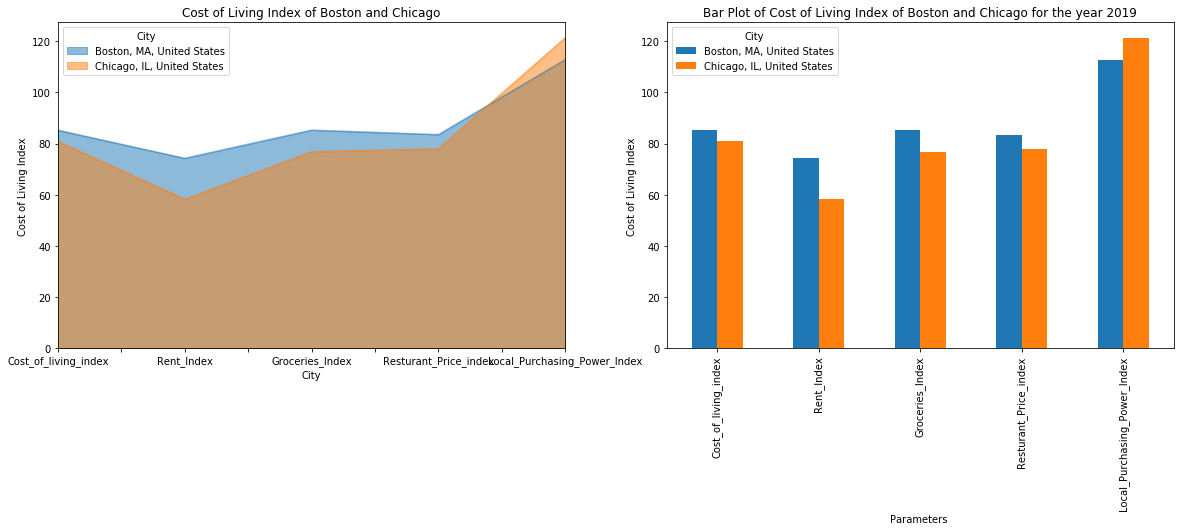

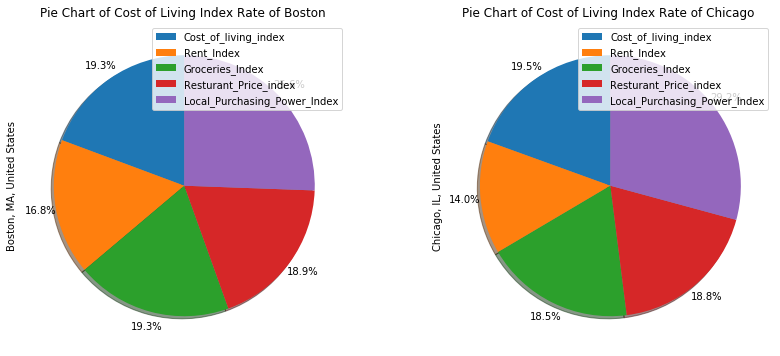

In [345]:
fig = plt.figure() # create figure
fig1 = plt.figure()
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2=  fig1.add_subplot(1,2,1)
ax3=fig1.add_subplot(1,2,2)
# Subplot 1: Area plot
result.plot(kind='area', 
             stacked=False,
             figsize=(14, 6), ax=ax0# pass a tuple (x, y) size
            )

ax0.set_title('Cost of Living Index of Boston and Chicago')
ax0.set_ylabel('Cost of Living Index')
ax0.set_xlabel('City')



# Subplot 2: Bar plot
result.plot(kind='bar', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Bar Plot of Cost of Living Index of Boston and Chicago for the year 2019')
ax1.set_ylabel('Cost of Living Index')
ax1.set_xlabel('Parameters ')


# subplot 3 pie chart of Boston City
result['Boston, MA, United States'].plot(kind='pie',
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels= None,        # turn off labels on pie chart
                            pctdistance=1.12,   # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            ax=ax2)
ax2.set_title('Pie Chart of Cost of Living Index Rate of Boston ')
ax2.legend(labels=result.index, loc='upper right') 
# subplot 4 pie chart of Chicago city
result['Chicago, IL, United States'].plot(kind='pie',
                            figsize=(14, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels= None,        # turn off labels on pie chart
                            pctdistance=1.12,   # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            ax=ax3)
ax3.set_title('Pie Chart of Cost of Living Index Rate of Chicago ')
ax3.legend(labels=result.index, loc='upper right') 
plt.show()

## Comparing Comparing Property Price Index for Chicago and Boston

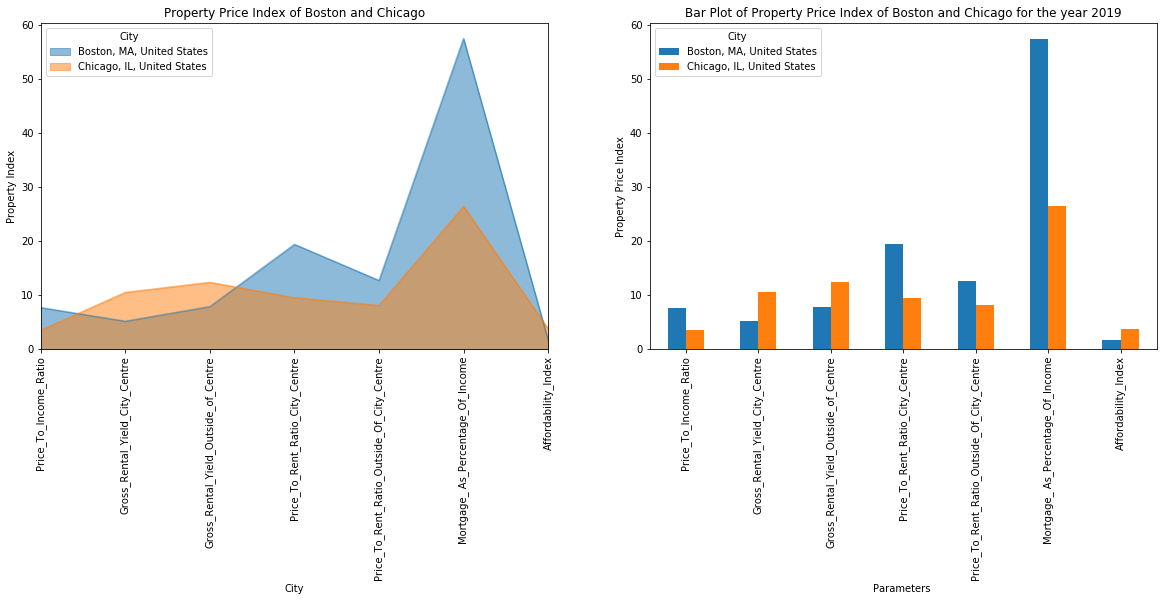

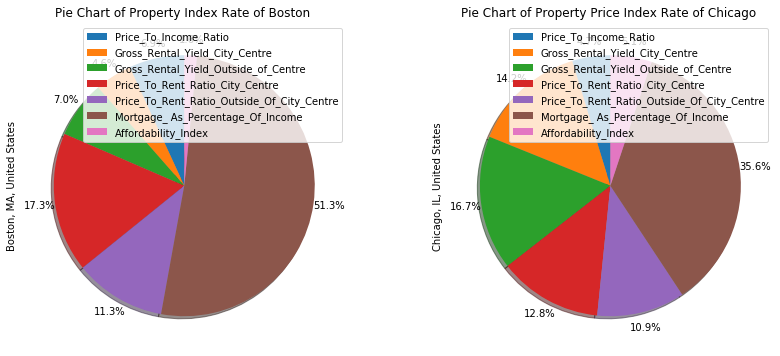

In [346]:
fig = plt.figure() # create figure
fig1 = plt.figure()
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax2=  fig1.add_subplot(1,2,1)
ax3=fig1.add_subplot(1,2,2)

# Subplot 1: Area plot
result1.plot(kind='area', 
             stacked=False,
             figsize=(14, 6), ax=ax0# pass a tuple (x, y) size
            )

ax0.set_title('Property Price Index of Boston and Chicago')
ax0.set_ylabel('Property Index')
ax0.set_xlabel('City')
ax0.set_xticklabels( labels=result1.index,rotation = 90)


# Subplot 2: Bar plot
result1.plot(kind='bar', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Bar Plot of Property Price Index of Boston and Chicago for the year 2019')
ax1.set_ylabel('Property Price Index')
ax1.set_xlabel('Parameters ')


# subplot 3 pie chart of Boston City
result1['Boston, MA, United States'].plot(kind='pie',
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels= None,        # turn off labels on pie chart
                            pctdistance=1.12,   # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            ax=ax2)
ax2.set_title('Pie Chart of Property Index Rate of Boston ')
ax2.legend(labels=result1.index, loc='upper right') 
# subplot 4 pie chart of Chicago city
result1['Chicago, IL, United States'].plot(kind='pie',
                            figsize=(14, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels= None,        # turn off labels on pie chart
                            pctdistance=1.12,   # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            ax=ax3)
ax3.set_title('Pie Chart of Property Price Index Rate of Chicago ')
ax3.legend(labels=result1.index, loc='upper right') 
plt.show()

# We can obeserve cost of living in Chicago is lower. Purchasing Power is higher in Chicago city as compared to Boston
# Cost of Property Prices, rents are higher in Boston.
## We can see living in Chicago is more affordable with the same salary structure



# It is recommended to relocate to Chicago

### Exploring the crime Data of the city of Chicago to determine safer  areas 

## Extracting Crime data of Chicago city for the year 2018  Data downloaded from the portal https://data.cityofchicago.org

In [347]:
body='C:\\Users\\Abha Vasal\\Desktop\\desktop folders\\coursera\\final project\\chicago_Crimes_2018.csv'
df1 = pd.read_csv(body)
newdf=df1
df1.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11416092,JB395922,08/16/2018 12:39:00 PM,031XX N KOLMAR AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,2521,25,31.0,20.0,05,1145501.0,1920490.0,2018,11/17/2019 03:50:04 PM,41.937823,-87.740668,"(41.937823144, -87.740668115)"
1,11893345,JC512903,09/18/2018 09:00:00 AM,014XX W 86TH ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,614,6,21.0,71.0,26,NaN,NaN,2018,11/17/2019 03:53:23 PM,NaN,NaN,NaN
2,11893156,JC511208,12/24/2018 11:30:00 PM,032XX W CONGRESS PKWY,0820,THEFT,$500 AND UNDER,CTA TRAIN,False,False,1134,11,28.0,27.0,06,NaN,NaN,2018,11/17/2019 03:53:23 PM,NaN,NaN,NaN
3,11892573,JC511642,11/22/2018 09:38:00 AM,065XX S RHODES AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,321,3,20.0,42.0,11,NaN,NaN,2018,11/16/2019 03:49:16 PM,NaN,NaN,NaN
4,11892405,JC511459,11/14/2018 12:01:00 AM,037XX N SOUTHPORT AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,1922,19,44.0,6.0,11,NaN,NaN,2018,11/16/2019 03:49:16 PM,NaN,NaN,NaN


In [348]:
df_crime = pd.read_csv(body)


In [349]:
#df1.shape
df_crime.shape

(267627, 22)

## Determining coordinates of Chicago City

In [350]:
from geopy.geocoders import Nominatim
address = 'Chicago, IL'
geolocator = Nominatim(user_agent="chicago_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago City are 41.8755616, -87.6244212.


In [351]:
### extracting top 1000 rows for visualization
top = df_crime[0:1000]

top = top[~top['Latitude'].isnull()]# removing null rows


### Visualizing 2018 Crime data of top rows on the Map of Chicago

In [352]:
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
for lat, lng in zip(top['Latitude'], top['Longitude']):
    #label = '{}, {}'.format(top200, 'dist')
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=5, popup='m',color='blue', fill=True, fill_color='#3186cc',fill_opacity=0.7,
                        parse_html=False).add_to(map_chicago)  
    
map_chicago

### Removing unnecessary Columns

In [353]:
#df1.drop(['Date','Block','Location Description', 'Beat','X Coordinate','Y Coordinate','Updated On'],axis=1, inplace=True)
#df1.drop(['IUCR','FBI Code','Location'],axis=1, inplace=True)
#df1.head()

df_crime.drop(['Date','Block','Location Description', 'Beat','X Coordinate','Y Coordinate','Updated On'],axis=1, inplace=True)
df_crime.drop(['IUCR','FBI Code','Location'],axis=1, inplace=True)
df_crime.head()

,ID,Case Number,Primary Type,Description,Arrest,Domestic,District,Ward,Community Area,Year,Latitude,Longitude
0,11416092,JB395922,BURGLARY,FORCIBLE ENTRY,True,False,25,31.0,20.0,2018,41.937823,-87.740668
1,11893345,JC512903,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,True,6,21.0,71.0,2018,NaN,NaN
2,11893156,JC511208,THEFT,$500 AND UNDER,False,False,11,28.0,27.0,2018,NaN,NaN
3,11892573,JC511642,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,3,20.0,42.0,2018,NaN,NaN
4,11892405,JC511459,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,19,44.0,6.0,2018,NaN,NaN


## Grouping Crime Data Ward wise

In [354]:

figwd=df_crime.groupby(['Ward'])['ID'].count().reset_index(name="Count_per_Ward")
figw= figwd.sort_values(by='Ward', ascending=True)
figwdt= figwd.sort_values(by='Count_per_Ward', ascending=False)
ward=figwdt
figwdt=figwdt.head()
figwdt ### stores Districts values with maximum crime

,Ward,Count_per_Ward
41,42.0,18143
23,24.0,12631
27,28.0,11910
26,27.0,11222
1,2.0,10086


### Ward no 42, 24, 28, 27 and 2 have maximum crimes recorded

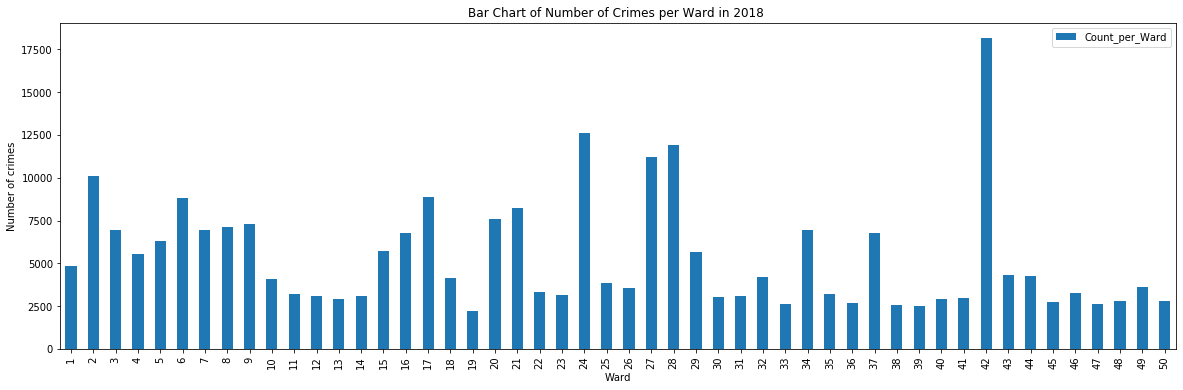

In [355]:
figure=figw
figure['Ward'] = figure['Ward'].astype(int)
fg=figure
fg=fg.sort_values(by='Ward', ascending=True)
fg.plot(kind='bar', x='Ward',y='Count_per_Ward',figsize=(20, 6))
plt.title('Bar Chart of Number of Crimes per Ward in 2018 ')
#ax2.legend(labels=result.index, loc='upper right') 
plt.xlabel('Ward')
plt.ylabel('Number of crimes')
plt.show()

In [356]:
df_crime['Community Area'].isnull().values.any()

True

## Grouping data Community Area wise 

In [357]:
import numpy as np

df_crime = df_crime[~df_crime['Community Area'].isin([0, np.NaN])] ### removing recor will null community Area

df_crime.groupby(by='Community Area').count()[['ID']].sort_values(by='ID', ascending=False).head(10)


,ID
Community Area,
25.0,15118
8.0,13079
32.0,10879
28.0,9437
29.0,9410
43.0,8682
23.0,8092
71.0,7414
24.0,7324


In [358]:
ca1d=df_crime.groupby(['Community Area'])['ID'].count().reset_index(name="Count_CommunityArea")
ca1d= ca1d.sort_values(by='Community Area', ascending=True)
ca1dt= ca1d.sort_values(by='Community Area', ascending=False)
ca1dt=ca1dt.head()
ca1d.head()

,Community Area,Count_CommunityArea
0,1.0,3826
1,2.0,3533
2,3.0,3654
3,4.0,1938
4,5.0,1331


## Grouping data District wise and Sorting the data on number of crimes in descending order

In [359]:


fig1d=df_crime.groupby(['District'])['ID'].count().reset_index(name="Count_per_District")
fig1= fig1d.sort_values(by='District', ascending=True)
fig1dt= fig1d.sort_values(by='Count_per_District', ascending=False)
f=fig1dt
fig1dt=fig1dt.head()
fig1dt ### stores Districts values with maximum crime


,District,Count_per_District
10,11,19163
5,6,16492
7,8,16374
16,18,16196
0,1,15667


## We can observe that most crimes are ocurring in Districts 11, 6, 8, 18 ,1

In [360]:
f.tail()

,District,Count_per_District
19,22,8448
20,24,7706
15,17,7629
18,20,4945
22,31,9


## We can observe that least crimes are ocurring in Districts 22, 24, 17, 20, 31

## Choropleth Map to show number of incidents per police District in Chicago

In [79]:
fig= fig1
fig['District'] = fig['District'].astype('int').astype('str')
district_geo= 'C:\\Users\\Abha Vasal\\Desktop\\desktop folders\\coursera\\final project\\chicago\\ChicagoDistricts.geojson'
map1 = folium.Map(location=[41.881832, -87.623177], zoom_start=11)
map1.choropleth(geo_data = district_geo, 
                
                data = fig,
                columns = ['District', 'Count_per_District'],
                key_on = 'feature.properties.dist_num',
                fill_color = 'YlOrRd', 
                fill_opacity = 0.7, 
                line_opacity = 0.2,
                #threshold_scale=[0, 4000, 8000, 12000, 16000, 20000],
                legend_name = 'Number of incidents per police District 2018')
map1

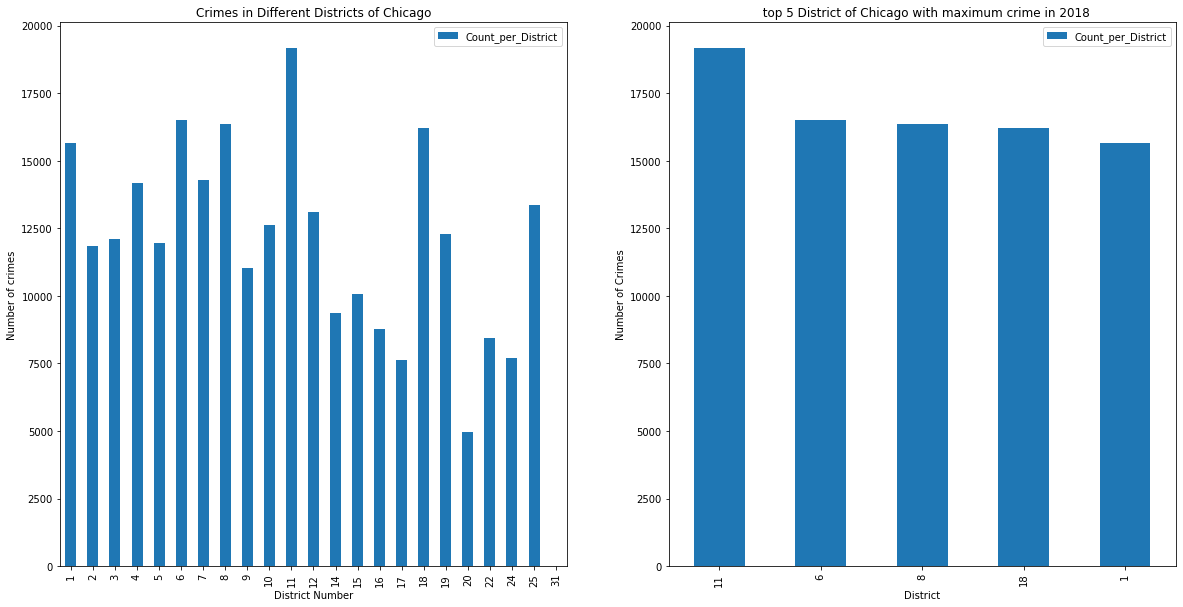

<Figure size 432x288 with 0 Axes>

In [361]:
fig = plt.figure() # create figure
fig1 = plt.figure()
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
#ax2=  fig1.add_subplot(1,2,1)
#ax3=fig1.add_subplot(1,2,2)
# Subplot 1: Bar graph
fig1d.plot(kind='bar', x='District',y='Count_per_District',figsize=(20, 6), ax=ax0)

ax0.set_title('Crimes in Different Districts of Chicago')
ax0.set_xlabel('District Number')
ax0.set_ylabel('Number of crimes')



# Subplot 2:Area plot
fig1dt.plot(kind='bar', x='District',y='Count_per_District',figsize=(20, 10), ax=ax1) # add to subplot 2
ax1.set_title ('  top 5 District of Chicago with maximum crime in 2018')
ax1.set_ylabel('Number of Crimes')
#ax1.set_xlabel('Parameters ')


plt.show()

In [362]:
#df_district=newdf
df_district= df_crime

In [363]:
## Making a copy of crime data for visualization on Map 
df_district.head()

,ID,Case Number,Primary Type,Description,Arrest,Domestic,District,Ward,Community Area,Year,Latitude,Longitude
0,11416092,JB395922,BURGLARY,FORCIBLE ENTRY,True,False,25,31.0,20.0,2018,41.937823,-87.740668
1,11893345,JC512903,OTHER OFFENSE,HARASSMENT BY TELEPHONE,False,True,6,21.0,71.0,2018,NaN,NaN
2,11893156,JC511208,THEFT,$500 AND UNDER,False,False,11,28.0,27.0,2018,NaN,NaN
3,11892573,JC511642,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,3,20.0,42.0,2018,NaN,NaN
4,11892405,JC511459,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,False,False,19,44.0,6.0,2018,NaN,NaN


In [364]:
#df_district.drop(columns=['Case Number','Description','Arrest','Domestic'],axis=1,inplace=True)
## Removing data with null values for longitude and latitude

df_district = df_district[~df_district['Latitude'].isnull()]
df_district = df_district[~df_district['Longitude'].isnull()]



In [365]:
new= df_district.groupby('Community Area').count().reset_index()
new_dist =pd.DataFrame(columns=['CommunityArea','Count','Longitude','Latitude'])


In [366]:

new_dist['CommunityArea']=new['Community Area'].astype(str)
new_dist['Count']= new['ID']
new_dist['Longitude']=df_district.groupby('Community Area')['Longitude'].mean()
new_dist['Latitude']= df_district.groupby('Community Area')['Latitude'].mean()
new_dist = new_dist[~new_dist['Latitude'].isnull()] 
#new_dist.head()

In [367]:
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)
# add markers to map
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(new_dist.Latitude, new_dist.Longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
latitudes = list(new_dist.Latitude)
longitudes = list(new_dist.Longitude)
labels = list(new_dist.Count)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_chicago) 
# add incidents to map
map_chicago.add_child(incidents)
    
map_chicago

### Above Map shows Number of Crimes in each Community Area

In [369]:
ca= ca1d
ca['Community Area']=ca['Community Area'].astype(str).astype(float)


ca.dtypes

Community Area         float64
Count_CommunityArea      int64
dtype: object

In [370]:

ca['Community Area']=ca['Community Area'].astype('int')

In [371]:
ca.rename(columns = {'Community Area':'CommunityArea'}, inplace = True)
ca.dtypes

CommunityArea          int32
Count_CommunityArea    int64
dtype: object

In [372]:
dist1= new_dist

dist1['CommunityArea']=dist1['CommunityArea'].astype('str')


In [373]:
dist2=dist1

#dist2.head()


In [374]:
mydf= new_dist


mydf=mydf[1:]



In [375]:

mydf['CommunityArea']=mydf['CommunityArea'].astype(float)

In [376]:
mydf['CommunityArea']=mydf['CommunityArea'].astype(int)

## Evaluating  Community Area data and sorting the data on number of crimes per Community Area

In [377]:
df1.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [378]:
# Storing count per community area
fig2d= df1.groupby('Community Area').count().reset_index()
#fig2d= dfcrime.groupby('Community Area').count().reset_index()
#fig_df =fig_df.transpose()

fig2d.drop(columns =['Case Number','Date', 'Block', 'IUCR','Primary Type','Description','Location Description','Arrest','Domestic',
                     'Beat','District','Ward','FBI Code', 'X Coordinate','Y Coordinate','Year','Updated On','Latitude','Longitude','Location'], axis =1,inplace=True)

fig2d.head()

,Community Area,ID
0,0.0,2
1,1.0,3826
2,2.0,3533
3,3.0,3654
4,4.0,1938


In [379]:
fig2d=df_crime.groupby(['Community Area'])['ID'].count().reset_index(name="Count_per_CommunityArea")
fig2= fig2d.sort_values(by='Count_per_CommunityArea', ascending=False)
#fig1dt= fig1d.sort_values(by='Count_per_District', ascending=False)
#f=fig1dt
fig2d=fig2.head()
fig2d

,Community Area,Count_per_CommunityArea
24,25.0,15118
7,8.0,13079
31,32.0,10879
27,28.0,9437
28,29.0,9410


## We can see that Community Areas 25, 8, 32, 28,29 have maximum crimes reported


In [380]:
fig2dt=fig2.tail()
fig2dt

,Community Area,Count_per_CommunityArea
17,18.0,603
73,74.0,570
11,12.0,496
46,47.0,386
8,9.0,253


## The top 5 safest community are 9, 47, 12, 74 and 18



## Visualizing Number of Crimes per District of Chicago

## Visualizing Number of Crimes per Community Area in 2018

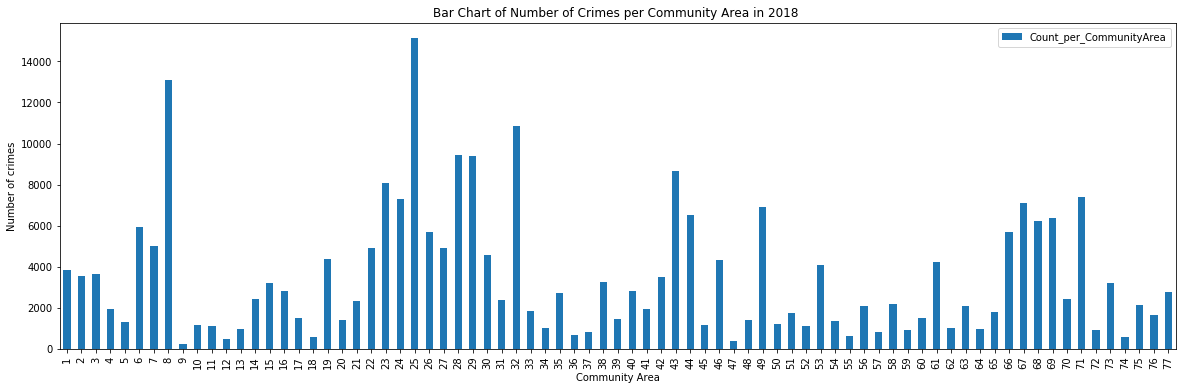

In [382]:
fig2['Community Area'] = fig2['Community Area'].astype(int)
fcom=fig2
fcom=fcom.sort_values(by='Community Area', ascending=True)
fcom.plot(kind='bar', x='Community Area',y='Count_per_CommunityArea',figsize=(20, 6))
plt.title('Bar Chart of Number of Crimes per Community Area in 2018 ')
#ax2.legend(labels=result.index, loc='upper right') 
plt.xlabel('Community Area')
plt.ylabel('Number of crimes')
plt.show()

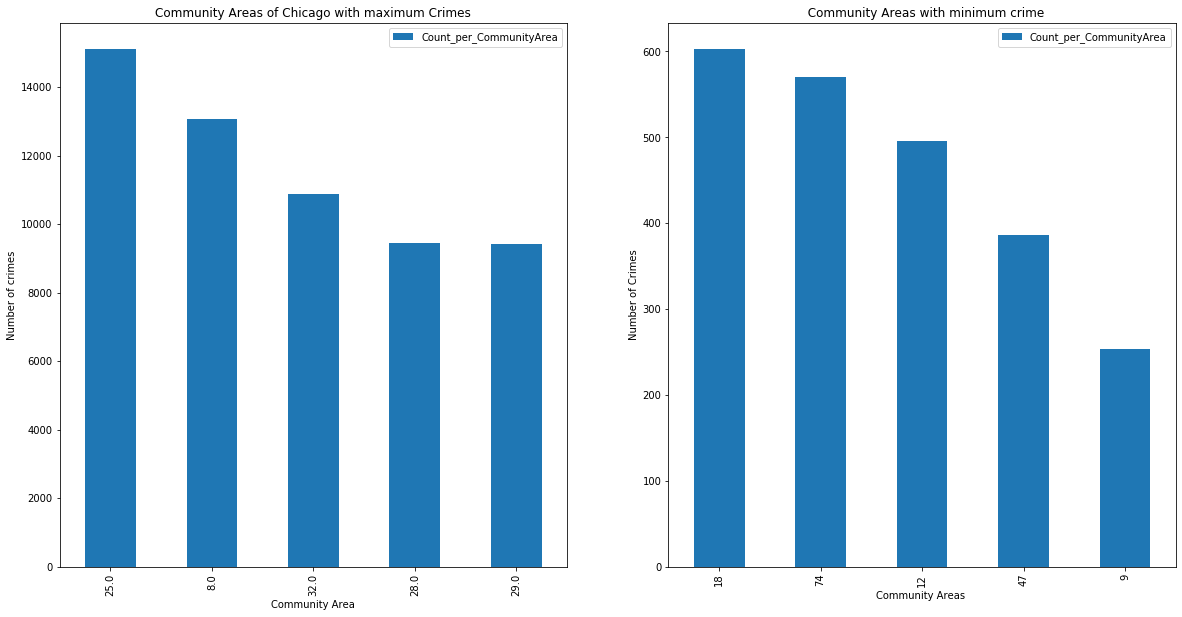

<Figure size 432x288 with 0 Axes>

In [383]:
fig = plt.figure() # create figure
fig1 = plt.figure()
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
#ax2=  fig1.add_subplot(1,2,1)
#ax3=fig1.add_subplot(1,2,2)
# Subplot 1: Bar graph
fig2d.plot(kind='bar', x='Community Area',y='Count_per_CommunityArea',figsize=(20, 6), ax=ax0)

ax0.set_title('Community Areas of Chicago with maximum Crimes')
ax0.set_xlabel('Community Area')
ax0.set_ylabel('Number of crimes')

fig2dt['Community Area']=fig2dt['Community Area'].astype(int)

# Subplot 2:Bar plot
fig2dt.plot(kind='bar', x='Community Area',y='Count_per_CommunityArea',figsize=(20, 10), ax=ax1) # add to subplot 2
ax1.set_title ('  Community Areas with minimum crime')
ax1.set_ylabel('Number of Crimes')
ax1.set_xlabel('Community Areas ')


plt.show()


## Chicago is divided into 77 community areas.Community areas are distinct from the more numerous neighborhoods in Chicago. Community areas often encompass groups of neighborhoods. Although many community areas contain more than one neighborhood, they may also share the same name, or parts of the name, of some of their individual neighborhoods.





### Extracting Community Names and Neighborhoods information from the wikipedia 

### Source https://en.wikipedia.org/wiki/Community_areas_in_Chicago

In [384]:
URL ='https://en.wikipedia.org/wiki/Community_areas_in_Chicago'
content=requests.get(URL).content
soup=BeautifulSoup(content,'html.parser')
all_tables=soup.find_all("table",{"class":"wikitable",})

wholedata=[]
lengths=[]


for table in range(len(all_tables)):
    x=all_tables[table].find("tr").find_next("tr")
    y=x.find_all("td")
    lengths.append(len(y))  
    for row in all_tables[table].find_all("tr"):
        wholedata.append([t.text.strip() for t in row.find_all('td')])
wholedata[0:5]

[[],
 ['08',
  'Near North Side',
  'Cabrini–Green\nThe Gold Coast\nGoose Island\nMagnificent Mile\nOld Town\nRiver North\nRiver West\nStreeterville'],
 ['32', 'Loop', 'Loop\nNew Eastside\nSouth Loop\nWest Loop Gate'],
 ['33',
  'Near South Side',
  "Dearborn Park\nPrinter's Row\nSouth Loop\nPrairie Avenue Historic District"],
 []]

In [385]:
ca_df = pd.DataFrame(wholedata, columns=['CommunityCode', 'CommunityArea', 'Neighbourhood'])
ca_df = ca_df[~ca_df['CommunityCode'].isnull()]
ca_df.head()

,CommunityCode,CommunityArea,Neighbourhood
1,08,Near North Side,Cabrini–Green\nThe Gold Coast\nGoose Island\nM...
2,32,Loop,Loop\nNew Eastside\nSouth Loop\nWest Loop Gate
3,33,Near South Side,Dearborn Park\nPrinter's Row\nSouth Loop\nPrai...
5,05,North Center,Horner Park\nRoscoe Village
6,06,Lake View,Boystown\nLake View East\nGraceland West\nSout...


### Replacing \n in Neighbourhood by commas

In [386]:
ca_df = ca_df.replace('\n',',', regex=True)

In [387]:
ca_df.head()

,CommunityCode,CommunityArea,Neighbourhood
1,08,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn..."
2,32,Loop,"Loop,New Eastside,South Loop,West Loop Gate"
3,33,Near South Side,"Dearborn Park,Printer's Row,South Loop,Prairie..."
5,05,North Center,"Horner Park,Roscoe Village"
6,06,Lake View,"Boystown,Lake View East,Graceland West,South E..."


In [388]:

ca_df["CommunityCode"]= ca_df["CommunityCode"].astype(int)

In [389]:
ca_df['Neighbourhood'].replace("", ca_df["CommunityArea"],inplace=True)

### If a cell has a Community Area but a Not assigned neighborhood, then assigning neighborhood same as the Community Area

### Extracting Community Area names for Community Areas Numbers

In [396]:

fig2d['Community Area']=fig2d['Community Area'].astype(int)
fig2d.head(10)

,Community Area,Count_per_CommunityArea
24,25,15118
7,8,13079
31,32,10879
27,28,9437
28,29,9410


In [391]:
ca_df.head()


,CommunityCode,CommunityArea,Neighbourhood
1,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn..."
2,32,Loop,"Loop,New Eastside,South Loop,West Loop Gate"
3,33,Near South Side,"Dearborn Park,Printer's Row,South Loop,Prairie..."
5,5,North Center,"Horner Park,Roscoe Village"
6,6,Lake View,"Boystown,Lake View East,Graceland West,South E..."


In [73]:
fig2new =fig2d

### Merging Dataframes to include Community Code, Community area along with details of Neighborhood

In [397]:

finalDataSet = pd.DataFrame.merge(ca_df, fig2d,how='inner', left_on='CommunityCode',right_on='Community Area')
finalDataSet.head()

,CommunityCode,CommunityArea,Neighbourhood,Community Area,Count_per_CommunityArea
0,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",8,13079
1,32,Loop,"Loop,New Eastside,South Loop,West Loop Gate",32,10879
2,25,Austin,"Galewood,The Island",25,15118
3,28,Near West Side,"Fulton River District,Fulton Market,Greektown,...",28,9437
4,29,North Lawndale,"Lawndale,Homan Square,Douglas Park",29,9410


In [399]:
finalDataSet= finalDataSet.sort_values(by='Count_per_CommunityArea', ascending=True).reset_index(drop=True)
finalDataSet.head()

,CommunityCode,CommunityArea,Neighbourhood,Community Area,Count_per_CommunityArea
0,29,North Lawndale,"Lawndale,Homan Square,Douglas Park",29,9410
1,28,Near West Side,"Fulton River District,Fulton Market,Greektown,...",28,9437
2,32,Loop,"Loop,New Eastside,South Loop,West Loop Gate",32,10879
3,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",8,13079
4,25,Austin,"Galewood,The Island",25,15118


In [400]:
finalDataSet.drop(["Community Area"],axis=1,inplace=True)
finalDataSet.head()

,CommunityCode,CommunityArea,Neighbourhood,Count_per_CommunityArea
0,29,North Lawndale,"Lawndale,Homan Square,Douglas Park",9410
1,28,Near West Side,"Fulton River District,Fulton Market,Greektown,...",9437
2,32,Loop,"Loop,New Eastside,South Loop,West Loop Gate",10879
3,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",13079
4,25,Austin,"Galewood,The Island",15118


In [401]:
mydf.head()

,CommunityArea,Count,Longitude,Latitude
2,3,3577,-87.693224,41.999446
3,4,1912,-87.657109,41.966388
4,5,1297,-87.688019,41.972359
5,6,5816,-87.682675,41.948148
6,7,4917,-87.653733,41.942936


### We can observe that Community Areas Edison Park, Burnside, Forest Glen, Mount Greenwood, Montclare are safer areas 

In [402]:
# create map of Chicago using latitude and longitude values of Community Areas as in Dataframe new_dist
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(new_dist['Latitude'], new_dist['Longitude'], new_dist['CommunityArea']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

In [403]:
dist3= finalDataSet
dist3.head()

,CommunityCode,CommunityArea,Neighbourhood,Count_per_CommunityArea
0,29,North Lawndale,"Lawndale,Homan Square,Douglas Park",9410
1,28,Near West Side,"Fulton River District,Fulton Market,Greektown,...",9437
2,32,Loop,"Loop,New Eastside,South Loop,West Loop Gate",10879
3,8,Near North Side,"Cabrini–Green,The Gold Coast,Goose Island,Magn...",13079
4,25,Austin,"Galewood,The Island",15118


## Splitting Neighbourhood column for each value and repeating rows

In [404]:
from itertools import chain

cols = dist3.columns.difference(['Neighbourhood'])
Neighbourhood = dist3['Neighbourhood'].str.split(',')

dist3=  (dist3.loc[dist3.index.repeat(Neighbourhood.str.len()), cols]
         .assign(Neighbourhood=list(chain.from_iterable(Neighbourhood.tolist()))))
dist3.head(10)

,CommunityArea,CommunityCode,Count_per_CommunityArea,Neighbourhood
0,North Lawndale,29,9410,Lawndale
0,North Lawndale,29,9410,Homan Square
0,North Lawndale,29,9410,Douglas Park
1,Near West Side,28,9437,Fulton River District
1,Near West Side,28,9437,Fulton Market
1,Near West Side,28,9437,Greektown
1,Near West Side,28,9437,Illinois Medical District
1,Near West Side,28,9437,Little Italy
1,Near West Side,28,9437,Tri-Taylor
2,Loop,32,10879,Loop


In [406]:
CLIENT_ID = 'hiding credentials' # my Foursquare ID
CLIENT_SECRET = 'for safety reasons' # my Foursquare Secret
VERSION = '20191129' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: hiding credentials
CLIENT_SECRET:for safety reasons


### The top 5 safest community Areas were  9, 47, 12, 74 and 18

In [506]:
mydf['CommunityArea']=mydf['CommunityArea'].astype('int32')
mydf.head()


,CommunityArea,Count,Longitude,Latitude
1,1,3750,-87.670759,42.012471
2,2,3481,-87.693224,41.999446
3,3,3577,-87.657109,41.966388
4,4,1912,-87.688019,41.972359
5,5,1297,-87.682675,41.948148


### Merging Community Area data with neighborhood data

In [507]:
chicagomerged= pd.merge(dist3,mydf,how='inner',left_on= 'CommunityCode',right_on= 'CommunityArea')
chicagomerged.head()

,CommunityArea_x,CommunityCode,Count_per_Community_Area,Neighbourhood,CommunityArea_y,Count,Longitude,Latitude
0,Edison Park,9,253,Edison Park,9,250,-87.813081,42.006482
1,Burnside,47,386,Burnside,47,380,-87.597472,41.727392
2,Forest Glen,12,496,Edgebrook,12,486,-87.752855,41.990313
3,Forest Glen,12,496,Old Edgebrook,12,486,-87.752855,41.990313
4,Forest Glen,12,496,South Edgebrook,12,486,-87.752855,41.990313


In [508]:
#chicagomerged.rename(index = {"CommunityArea_x": "CommunityArea"}, inplace = True) 
chicagomerged.drop(['CommunityArea_y'],axis=1,inplace=True)

In [509]:
#chicagomerged.rename(columns = {"CommunityArea_x": "CommunityArea"}) 
chicagomerged.head()

,CommunityArea_x,CommunityCode,Count_per_Community_Area,Neighbourhood,Count,Longitude,Latitude
0,Edison Park,9,253,Edison Park,250,-87.813081,42.006482
1,Burnside,47,386,Burnside,380,-87.597472,41.727392
2,Forest Glen,12,496,Edgebrook,486,-87.752855,41.990313
3,Forest Glen,12,496,Old Edgebrook,486,-87.752855,41.990313
4,Forest Glen,12,496,South Edgebrook,486,-87.752855,41.990313


### Extract Neighborhood details for the safest community area 9(Edison Park)

In [510]:
safe= chicagomerged.get_value(0, 3, takeable = True) 

neighborhood_latitude=chicagomerged.get_value(0, 6, takeable = True)
neighborhood_longitude=chicagomerged.get_value(0, 5, takeable = True)
print('Safest neighborhood is ',safe,'its latitude longitude are ',neighborhood_latitude,'  ',neighborhood_longitude)

Safest neighborhood is  Edison Park its latitude longitude are  42.006481839264    -87.81308058127604


### Exploring the top 100 venues that are in Edison Park within a radius of 500 meters

In [511]:
LIMIT = 100 
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=1Z0EQMANX1HK0M1TY0QEKWOUYUCJLYRFG3R53UG501OJNQGS&client_secret=NHCW02TSSCROPRMNQFUO0CZVWJAECHUZ3VFO3DSCYUMJHU5P&v=20191124&ll=42.006481839264,-87.81308058127604&radius=500&limit=100'

### Send the GET request and examine the results

In [512]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ddacc31be61c9001bed8bdd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Edison Park',
  'headerFullLocation': 'Edison Park, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 16,
  'suggestedBounds': {'ne': {'lat': 42.010981843764,
    'lng': -87.80703591821366},
   'sw': {'lat': 42.001981834763995, 'lng': -87.81912524433842}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b1ab1f1f964a52094ef23e3',
       'name': "Tony's Italian Deli and Subs",
       'location': {'address': '6708 N Northwest Hwy',
        'lat': 42.00288174430382,
        'lng': -87.81644343079547,
        '

#### Defining get_category_type function for categorising the venues

In [513]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [514]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Tony's Italian Deli and Subs,Deli / Bodega,42.002882,-87.816443
1,Zia's Trattoria,Italian Restaurant,42.002697,-87.816013
2,Nonno Pino's,Italian Restaurant,42.003132,-87.816886
3,The Curragh,Pub,42.002902,-87.816361
4,Giordano's,Pizza Place,42.003149,-87.816317


In [515]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

16 venues were returned by Foursquare.


## Explore Safe Neighborhoods in Chicago City


### Let's create a function to repeat the same process to  top 20 safe neighborhoods 

In [516]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [517]:
chicagomerged.head(20)

,CommunityArea_x,CommunityCode,Count_per_Community_Area,Neighbourhood,Count,Longitude,Latitude
0,Edison Park,9,253,Edison Park,250,-87.813081,42.006482
1,Burnside,47,386,Burnside,380,-87.597472,41.727392
2,Forest Glen,12,496,Edgebrook,486,-87.752855,41.990313
3,Forest Glen,12,496,Old Edgebrook,486,-87.752855,41.990313
4,Forest Glen,12,496,South Edgebrook,486,-87.752855,41.990313
5,Forest Glen,12,496,Sauganash,486,-87.752855,41.990313
6,Forest Glen,12,496,Wildwood,486,-87.752855,41.990313
7,Mount Greenwood,74,570,Mount Greenwood Heights,552,-87.708368,41.695087
8,Mount Greenwood,74,570,Talley's Corner,552,-87.708368,41.695087
9,Montclare,18,603,Montclare,592,-87.798532,41.928947


In [518]:
# Extracting data for safest Community Areas
chicago100 =chicagomerged.head(20)

In [519]:
chicago_venues = getNearbyVenues(names=chicago100['Neighbourhood'],
                                   latitudes=chicago100['Latitude'],
                                   longitudes=chicago100['Longitude']
                                  )

Edison Park
Burnside
Edgebrook
Old Edgebrook
South Edgebrook
Sauganash
Wildwood
Mount Greenwood Heights
Talley's Corner
Montclare
Hegewisch
Oakland
Archer Heights
Fuller Park
McKinley Park
Beverly
Chrysler Village
Brynford Park
Hollywood Park
River's Edge


In [520]:
print(chicago_venues.shape)
chicago_venues.head()

(208, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Edison Park,42.006482,-87.813081,Tony's Italian Deli and Subs,42.002882,-87.816443,Deli / Bodega
1,Edison Park,42.006482,-87.813081,Zia's Trattoria,42.002697,-87.816013,Italian Restaurant
2,Edison Park,42.006482,-87.813081,Nonno Pino's,42.003132,-87.816886,Italian Restaurant
3,Edison Park,42.006482,-87.813081,The Curragh,42.002902,-87.816361,Pub
4,Edison Park,42.006482,-87.813081,Giordano's,42.003149,-87.816317,Pizza Place


#### Let's check how many venues were returned for each neighborhood

In [521]:
chicago_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Archer Heights,21,21,21,21,21,21
Beverly,2,2,2,2,2,2
Brynford Park,24,24,24,24,24,24
Burnside,4,4,4,4,4,4
Chrysler Village,18,18,18,18,18,18
Edgebrook,6,6,6,6,6,6
Edison Park,16,16,16,16,16,16
Fuller Park,6,6,6,6,6,6
Hegewisch,7,7,7,7,7,7


In [522]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 71 uniques categories.


## Analyze Each Neighborhood

In [523]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]
chicago_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Bakery,Bar,Baseball Field,Boutique,Breakfast Spot,Bus Station,Chinese Restaurant,Coffee Shop,College Bookstore,College Quad,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Discount Store,Donut Shop,Dry Cleaner,Fast Food Restaurant,Financial or Legal Service,French Restaurant,Fried Chicken Joint,Gas Station,Gay Bar,Gift Shop,Golf Course,Grocery Store,Gym,Home Service,Hot Dog Joint,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Liquor Store,Lounge,Market,Mexican Restaurant,Mobile Phone Shop,Moving Target,Nightclub,Optical Shop,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Public Art,Radio Station,Rental Car Location,Rental Service,Restaurant,Sandwich Place,Seafood Restaurant,Soccer Field,Souvenir Shop,Spa,Sports Bar,Taco Place,Tea Room,Thrift / Vintage Store,Track,Train Station,Video Game Store,Video Store,Wings Joint
0,Edison Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Edison Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Edison Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Edison Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Edison Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [524]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Bakery,Bar,Baseball Field,Boutique,Breakfast Spot,Bus Station,Chinese Restaurant,Coffee Shop,College Bookstore,College Quad,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Diner,Discount Store,Donut Shop,Dry Cleaner,Fast Food Restaurant,Financial or Legal Service,French Restaurant,Fried Chicken Joint,Gas Station,Gay Bar,Gift Shop,Golf Course,Grocery Store,Gym,Home Service,Hot Dog Joint,Indian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Liquor Store,Lounge,Market,Mexican Restaurant,Mobile Phone Shop,Moving Target,Nightclub,Optical Shop,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pub,Public Art,Radio Station,Rental Car Location,Rental Service,Restaurant,Sandwich Place,Seafood Restaurant,Soccer Field,Souvenir Shop,Spa,Sports Bar,Taco Place,Tea Room,Thrift / Vintage Store,Track,Train Station,Video Game Store,Video Store,Wings Joint
0,Archer Heights,0.000000,0.000000,0.142857,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0000,0.000000,0.095238,0.000000,0.00,0.000000,0.047619,0.00,0.00,0.047619,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.190476,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.0000,0.000000,0.000000,0.047619,0.047619,0.000000,0.000000,0.047619,0.000000,0.0,0.0000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.00
1,Beverly,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,Brynford Park,0.000000,0.041667,0.041667,0.041667,0.000000,0.000000,0.041667,0.083333,0.000000,0.083333,0.041667,0.041667,0.00,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.041667,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000,0.041667,0.166667,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.041667,0.000000,0.000000,0.000000,0.083333,0.000000,0.041667,0.0,0.0000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
3,Burnside,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.0000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.25,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.00
4,Chrysler Village,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.00,0.055556,0.000000,0.055556,0.000000,0.055556,0.055556,0.00,0.055556,0.00,0.0000,0.055556,0.000000,0.055556,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.0000,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.055556,0.111111,0.055556,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.0

### Printing each neighborhood along with the top 5 most common venues

In [525]:
num_top_venues = 5

for hood in chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Archer Heights----
                 venue  freq
0   Mexican Restaurant  0.19
1               Bakery  0.14
2          Gas Station  0.10
3           Taco Place  0.05
4  Rental Car Location  0.05


----Beverly----
                 venue  freq
0        Souvenir Shop   0.5
1                 Park   0.5
2  American Restaurant   0.0
3        Radio Station   0.0
4                  Pub   0.0


----Brynford Park----
               venue  freq
0  Korean Restaurant  0.17
1     Sandwich Place  0.08
2        Bus Station  0.08
3        Coffee Shop  0.08
4       Soccer Field  0.04


----Burnside----
                        venue  freq
0                Intersection  0.25
1               Train Station  0.25
2           Convenience Store  0.25
3  Construction & Landscaping  0.25
4         American Restaurant  0.00


----Chrysler Village----
                 venue  freq
0          Video Store  0.11
1          Pizza Place  0.11
2  American Restaurant  0.06
3    Convenience Store  0.06
4            Night

#### Defining a function to sort the venues in descending order

In [526]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [527]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Archer Heights,Mexican Restaurant,Bakery,Gas Station,Hot Dog Joint,Pharmacy,Nightclub,Cosmetics Shop,Mobile Phone Shop,Rental Car Location,Rental Service
1,Beverly,Park,Souvenir Shop,Wings Joint,Discount Store,Dry Cleaner,Fast Food Restaurant,Financial or Legal Service,French Restaurant,Fried Chicken Joint,Gas Station
2,Brynford Park,Korean Restaurant,Sandwich Place,Bus Station,Coffee Shop,Park,Japanese Restaurant,Radio Station,College Quad,College Bookstore,Soccer Field
3,Burnside,Intersection,Train Station,Convenience Store,Construction & Landscaping,Wings Joint,Gas Station,Fast Food Restaurant,Financial or Legal Service,French Restaurant,Fried Chicken Joint
4,Chrysler Village,Video Store,Pizza Place,American Restaurant,Convenience Store,Gay Bar,Fried Chicken Joint,Mexican Restaurant,Nightclub,Fast Food Restaurant,Donut Shop


## Cluster Neighborhoods

In [528]:
# set number of clusters
kclusters = 4

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 1, 1, 1, 2, 1, 1, 1, 1])

In [474]:
#neighborhoods_venues_sorted.drop(['Cluster Labels'],axis =1,inplace=True)

#### creating a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [529]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
chicago_merged = chicagomerged

# merge chicago_grouped with chicago_data to add latitude/longitude for each neighborhood
chicago_merged = pd.merge(chicago_merged,neighborhoods_venues_sorted,how='inner',left_on='Neighbourhood', right_on='Neighborhood')


In [530]:
chicago_merged.head()


,CommunityArea_x,CommunityCode,Count_per_Community_Area,Neighbourhood,Count,Longitude,Latitude,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Edison Park,9,253,Edison Park,250,-87.813081,42.006482,1,Edison Park,Italian Restaurant,Mexican Restaurant,Pizza Place,Spa,Liquor Store,French Restaurant,Deli / Bodega,Hot Dog Joint,Seafood Restaurant,Pub
1,Burnside,47,386,Burnside,380,-87.597472,41.727392,1,Burnside,Intersection,Train Station,Convenience Store,Construction & Landscaping,Wings Joint,Gas Station,Fast Food Restaurant,Financial or Legal Service,French Restaurant,Fried Chicken Joint
2,Forest Glen,12,496,Edgebrook,486,-87.752855,41.990313,2,Edgebrook,Insurance Office,Grocery Store,Fast Food Restaurant,Golf Course,Moving Target,Indian Restaurant,Gym,Home Service,Hot Dog Joint,Gift Shop
3,Forest Glen,12,496,Old Edgebrook,486,-87.752855,41.990313,2,Old Edgebrook,Insurance Office,Grocery Store,Fast Food Restaurant,Golf Course,Moving Target,Indian Restaurant,Gym,Home Service,Hot Dog Joint,Gift Shop
4,Forest Glen,12,496,South Edgebrook,486,-87.752855,41.990313,2,South Edgebrook,Insurance Office,Grocery Store,Fast Food Restaurant,Golf Course,Moving Target,Indian Restaurant,Gym,Home Service,Hot Dog Joint,Gift Shop


### Mapping the clusters

In [532]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighbourhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine clusters

### Cluster 1

In [533]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,CommunityCode,Longitude,Latitude,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,74,-87.708368,41.695087,0,Mount Greenwood Heights,Gift Shop,Dry Cleaner,Home Service,Gym,Gas Station,Fast Food Restaurant,Financial or Legal Service,French Restaurant,Fried Chicken Joint,Wings Joint
8,74,-87.708368,41.695087,0,Talley's Corner,Gift Shop,Dry Cleaner,Home Service,Gym,Gas Station,Fast Food Restaurant,Financial or Legal Service,French Restaurant,Fried Chicken Joint,Wings Joint


### Cluster 2

In [534]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,CommunityCode,Longitude,Latitude,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,9,-87.813081,42.006482,1,Edison Park,Italian Restaurant,Mexican Restaurant,Pizza Place,Spa,Liquor Store,French Restaurant,Deli / Bodega,Hot Dog Joint,Seafood Restaurant,Pub
1,47,-87.597472,41.727392,1,Burnside,Intersection,Train Station,Convenience Store,Construction & Landscaping,Wings Joint,Gas Station,Fast Food Restaurant,Financial or Legal Service,French Restaurant,Fried Chicken Joint
9,18,-87.798532,41.928947,1,Montclare,Wings Joint,Pizza Place,Home Service,Financial or Legal Service,Gas Station,Dry Cleaner,Fast Food Restaurant,French Restaurant,Fried Chicken Joint,Gay Bar
10,55,-87.544482,41.656561,1,Hegewisch,Chinese Restaurant,Lounge,Deli / Bodega,Pet Store,Market,Pizza Place,Golf Course,Grocery Store,Gift Shop,Dry Cleaner
12,57,-87.727011,41.806666,1,Archer Heights,Mexican Restaurant,Bakery,Gas Station,Hot Dog Joint,Pharmacy,Nightclub,Cosmetics Shop,Mobile Phone Shop,Rental Car Location,Rental Service
13,37,-87.632231,41.804750,1,Fuller Park,Bus Station,Train Station,Optical Shop,Restaurant,Wings Joint,Gas Station,Dry Cleaner,Fast Food Restaurant,Financial or Legal Service,French Restaurant
14,59,-87.674325,41.830451,1,McKinley Park,Diner,Thrift / Vintage Store,Chinese Restaurant,Seafood Restaurant,Discount Store,Mexican Restaurant,Gas Station,Pharmacy,Baseball Field,Grocery Store
16,64,-87.767073,41.778296,1,Chrysler Village,Video Store,Pizza Place,American Restaurant,Convenience Store,Gay Bar,Fried Chicken Joint,Mexican Restaurant,Nightclub,Fast Food Restaurant,Donut Shop
17,13,-87.716362,41.984665,1,Brynford Park,Korean Restaurant,Sandwich Place,Bus Station,Coffee Shop,Park,Japanese Restaurant,Radio Station,College Quad,College Bookstore,Soccer Field
18,13,-87.716362,41.984665,1,Hollywood Park,Korean Restaurant,Sandwich Place,Bus Station,Coffee Shop,Park,Japanese Restaurant,Radio Station,College Quad,College Bookstore,Soccer Field


### Cluster 3

In [535]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,CommunityCode,Longitude,Latitude,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,12,-87.752855,41.990313,2,Edgebrook,Insurance Office,Grocery Store,Fast Food Restaurant,Golf Course,Moving Target,Indian Restaurant,Gym,Home Service,Hot Dog Joint,Gift Shop
3,12,-87.752855,41.990313,2,Old Edgebrook,Insurance Office,Grocery Store,Fast Food Restaurant,Golf Course,Moving Target,Indian Restaurant,Gym,Home Service,Hot Dog Joint,Gift Shop
4,12,-87.752855,41.990313,2,South Edgebrook,Insurance Office,Grocery Store,Fast Food Restaurant,Golf Course,Moving Target,Indian Restaurant,Gym,Home Service,Hot Dog Joint,Gift Shop
5,12,-87.752855,41.990313,2,Sauganash,Insurance Office,Grocery Store,Fast Food Restaurant,Golf Course,Moving Target,Indian Restaurant,Gym,Home Service,Hot Dog Joint,Gift Shop
6,12,-87.752855,41.990313,2,Wildwood,Insurance Office,Grocery Store,Fast Food Restaurant,Golf Course,Moving Target,Indian Restaurant,Gym,Home Service,Hot Dog Joint,Gift Shop


### Cluster 4

In [536]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 3, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,CommunityCode,Longitude,Latitude,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,36,-87.605781,41.824837,3,Oakland,Park,Public Art,Track,Boutique,Gas Station,Dry Cleaner,Fast Food Restaurant,Financial or Legal Service,French Restaurant,Fried Chicken Joint
15,72,-87.673440,41.711893,3,Beverly,Park,Souvenir Shop,Wings Joint,Discount Store,Dry Cleaner,Fast Food Restaurant,Financial or Legal Service,French Restaurant,Fried Chicken Joint,Gas Station


In [445]:
search_df =chicago_merged

### Cluster 2 has Convenience store eating joints gas station Bust station near it. Comfortable for staying

### Looking for schools in neighborhoods of cluster 2

#### Extracting neighbourhoods of cluster 2

In [537]:

#search_df.drop(['CommunityArea_x','Count_per_Community_Area','Neighbourhood','Count','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'], axis=1, inplace=True)
search_df.head()

,CommunityCode,Longitude,Latitude,Cluster Labels,Neighborhood
0,9,-87.813081,42.006482,1,Edison Park
1,47,-87.597472,41.727392,1,Burnside
2,12,-87.752855,41.990313,2,Edgebrook
3,12,-87.752855,41.990313,2,Old Edgebrook
4,12,-87.752855,41.990313,2,South Edgebrook


In [538]:
# searching for schools in the radius of 1000 metres
#search_query = 'school'
#radius = 1000
#for lat, lon, N in zip(search_df['Latitude'], search_df['Longitude'], search_df['Neighborhood']):
#    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, radius, LIMIT)
#    results = requests.get(url).json()
#    schools = results['response']['venues']
    
# tranform venues into a dataframe
#dataframe = json_normalize(schools)
#dataframe.head()


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4cd2e5301a096a31d3eac7a7,5501 N Kedzie Ave,US,Chicago,United States,at W Catalpa Ave,818,"[5501 N Kedzie Ave (at W Catalpa Ave), Chicago...","[{'label': 'display', 'lat': 41.98076634701549...",41.980766,-87.707969,60625,IL,Northside College Preparatory High School,v-1574621806
1,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4bd7346409ecb713895c467c,NaN,US,Chicago,United States,NaN,343,"[Chicago, IL 60659, United States]","[{'label': 'display', 'lat': 41.98719017129576...",41.987190,-87.713969,60659,IL,Bais Yaakov High School,v-1574621806
2,"[{'id': '4bf58dd8d48988d1a0941735', 'name': 'C...",False,4cf4118a899c6ea809d7fec1,3730 W Bryn Mawr Ave,US,Chicago,United States,NaN,398,"[3730 W Bryn Mawr Ave, Chicago, IL 60659, Unit...","[{'label': 'display', 'lat': 41.98342726556089...",41.983427,-87.720886,60659,IL,Northside Learning Center High School,v-1574621806
3,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4c88e4f1944e224b0bd21f85,5510 N Christiana Ave,US,Chicago,United States,NaN,382,"[5510 N Christiana Ave, Chicago, IL 60625, Uni...","[{'label': 'display', 'lat': 41.98242755150421...",41.982428,-87.712847,60625,IL,Peterson School,v-1574621806
4,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",False,50b37645e4b0dc720e129cc2,5510 N Christiana Ave,US,Chicago,United States,NaN,463,"[5510 N Christiana Ave, Chicago, IL 60625, Uni...","[{'label': 'display', 'lat': 41.98145190880719...",41.981452,-87.712800,60625,IL,Mary Gage Peterson Elementary School,v-1574621806


In [539]:
#dataframe.shape

(7, 17)

In [540]:
#school_result= dataframe

In [541]:
#school_result.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4cd2e5301a096a31d3eac7a7,5501 N Kedzie Ave,US,Chicago,United States,at W Catalpa Ave,818,"[5501 N Kedzie Ave (at W Catalpa Ave), Chicago...","[{'label': 'display', 'lat': 41.98076634701549...",41.980766,-87.707969,60625,IL,Northside College Preparatory High School,v-1574621806
1,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4bd7346409ecb713895c467c,NaN,US,Chicago,United States,NaN,343,"[Chicago, IL 60659, United States]","[{'label': 'display', 'lat': 41.98719017129576...",41.987190,-87.713969,60659,IL,Bais Yaakov High School,v-1574621806
2,"[{'id': '4bf58dd8d48988d1a0941735', 'name': 'C...",False,4cf4118a899c6ea809d7fec1,3730 W Bryn Mawr Ave,US,Chicago,United States,NaN,398,"[3730 W Bryn Mawr Ave, Chicago, IL 60659, Unit...","[{'label': 'display', 'lat': 41.98342726556089...",41.983427,-87.720886,60659,IL,Northside Learning Center High School,v-1574621806
3,"[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",False,4c88e4f1944e224b0bd21f85,5510 N Christiana Ave,US,Chicago,United States,NaN,382,"[5510 N Christiana Ave, Chicago, IL 60625, Uni...","[{'label': 'display', 'lat': 41.98242755150421...",41.982428,-87.712847,60625,IL,Peterson School,v-1574621806
4,"[{'id': '4f4533804b9074f6e4fb0105', 'name': 'E...",False,50b37645e4b0dc720e129cc2,5510 N Christiana Ave,US,Chicago,United States,NaN,463,"[5510 N Christiana Ave, Chicago, IL 60625, Uni...","[{'label': 'display', 'lat': 41.98145190880719...",41.981452,-87.712800,60625,IL,Mary Gage Peterson Elementary School,v-1574621806


### Define information of interest and filter dataframe

## Define a function getNearbySchools that looks for all schools in the safe neighborhoods

In [546]:
def getNearbySchools(names, latitudes, longitudes, radius=1000):
    
    venues_list= pd.DataFrame()
    search_query ='school'
    radius=1000
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
    
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        # tranform venues into a dataframe
        venues_list=venues_list.append(json_normalize(results))
       

    return(venues_list)

In [547]:
school_venues = getNearbySchools(names=chicago100['Neighbourhood'],
                                   latitudes=chicago100['Latitude'],
                                   longitudes=chicago100['Longitude'])


Edison Park
Burnside
Edgebrook
Old Edgebrook
South Edgebrook
Sauganash
Wildwood
Mount Greenwood Heights
Talley's Corner
Montclare
Hegewisch
Oakland
Archer Heights
Fuller Park
McKinley Park
Beverly
Chrysler Village
Brynford Park
Hollywood Park
River's Edge


In [548]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in school_venues.columns if col.startswith('location.')] + ['id']
school_dataframe_filtered = school_venues.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
school_dataframe_filtered['categories'] = school_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
school_dataframe_filtered.columns = [column.split('.')[-1] for column in school_dataframe_filtered.columns]

school_dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,"Administration Building, Lincolnwood School Di...",Government Building,6950 N East Prairie Rd,US,Lincolnwood,United States,NaN,836,"[6950 N East Prairie Rd, Lincolnwood, IL 60712...","[{'label': 'display', 'lat': 42.00662783127496...",42.006628,-87.726470,NaN,60712,IL,5124f1d0e4b0a2268f659c29
1,"Todd Hall, Lincolnwood School District 74",School,3925 W Lunt Ave,US,Lincolnwood,United States,NaN,958,"[3925 W Lunt Ave, Lincolnwood, IL 60712, Unite...","[{'label': 'display', 'lat': 42.00733958885679...",42.007340,-87.727889,NaN,60712,IL,4d430420b7a0a1cd740b78f8
2,JCB Yeshiva - Rabbi Doug's School,Student Center,3145 W Pratt Blvd,US,Chicago,United States,Kedzie,645,"[3145 W Pratt Blvd (Kedzie), Chicago, IL 60645...","[{'label': 'display', 'lat': 42.00464370325810...",42.004644,-87.708956,NaN,60645,IL,503794a3e4b05b4c7a228b67
3,Roza's School Of Nail Technology,Trade School,NaN,US,Chicago,United States,NaN,1161,"[Chicago, IL, United States]","[{'label': 'display', 'lat': 41.99742115950946...",41.997421,-87.723330,NaN,NaN,IL,4e6e7a83b61c13cf15d4e690
4,Rutledge High School,High School,NaN,US,Lincolnwood,United States,NaN,857,"[Lincolnwood, IL, United States]","[{'label': 'display', 'lat': 42.0057308, 'lng'...",42.005731,-87.726677,NaN,NaN,IL,56d0b017498e63498ae35f49
5,Lincoln Hall Middle School,School,NaN,US,NaN,United States,NaN,616,"[Illinois, United States]","[{'label': 'display', 'lat': 42.00160628386609...",42.001606,-87.719888,NaN,NaN,Illinois,4d2f4a1d49bb721ed44e8695
6,Asia Driving School,Driving School,3122 W Devon Ave,US,Chicago,United States,NaN,1208,"[3122 W Devon Ave, Chicago, IL 60659, United S...","[{'label': 'display', 'lat': 41.997643, 'lng':...",41.997643,-87.707870,NaN,60659,IL,5c8d61df3ba767002c81b063
0,Northwest School,School,3600 W 92nd St,US,Evergreen Park,United States,NaN,303,"[3600 W 92nd St, Evergreen Park, IL 60805, Uni...","[{'label': 'display', 'lat': 41.72654166585985...",41.726542,-87.712886,NaN,60805,IL,4c87d2442a1f6dcb0b29c5ee
1,School District 123 Admin Office,Office,4201 W 93rd St,US,Oak Lawn,United States,NaN,1023,"[4201 W 93rd St, Oak Lawn, IL 60453, United St...","[{'label': 'display', 'lat': 41.723413, 'lng':...",41.723413,-87.727461,NaN,60453,IL,4e734f19fa76812398c8ed6b
2,judy lei music school,Music Store,NaN,US,Evergreen Park,United States,NaN,788,"[Evergreen Park, IL, United States]","[{'label': 'display', 'lat': 41.720378, 'lng':...",41.720378,-87.717724,NaN,NaN,IL,5633e6c5498e7e66a0bc88c4


In [549]:
schools_new =school_dataframe_filtered

In [550]:
schools_new.sort_values(["name"], axis=0,inplace=True) 


In [551]:
schools_new.shape

(140, 16)

### Removing duplicate rows of suggested schools

In [552]:
s=schools_new[~schools_new["name"].apply(pd.Series).duplicated()]


In [553]:
s.shape

(66, 16)

## Visualizing near by schools

In [554]:
schools_map = folium.Map(location=[41.8781, -87.6298], zoom_start=10) # generate map centred around Lincolnwood 

# add a red circle marker to represent Lincolnwood
folium.CircleMarker(
    [41.8781, -87.6298],
    radius=6,
    color='red',
    popup='Chicago City',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(schools_map)

# add the schools as blue circle markers
for lat, lng, label in zip(s.lat, s.lng, s.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(schools_map)

# display map
schools_map

# Searching for Housing Properties for staying with family

In [577]:
def getNearbyHouses(names, latitudes, longitudes, radius=1000):
    
    house_list= pd.DataFrame()
    search_query ='Housing Apartment'
    radius=1000
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
    
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lon, VERSION, search_query, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        # tranform venues into a dataframe
        house_list=house_list.append(json_normalize(results))
       

    return(house_list)

In [578]:
house_venues = getNearbyHouses(names=chicago100['Neighbourhood'],
                                   latitudes=chicago100['Latitude'],
                                   longitudes=chicago100['Longitude'])


Edison Park
Burnside
Edgebrook
Old Edgebrook
South Edgebrook
Sauganash
Wildwood
Mount Greenwood Heights
Talley's Corner
Montclare
Hegewisch
Oakland
Archer Heights
Fuller Park
McKinley Park
Beverly
Chrysler Village
Brynford Park
Hollywood Park
River's Edge


In [579]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in house_venues.columns if col.startswith('location.')] + ['id']
house_dataframe_filtered = house_venues.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
house_dataframe_filtered['categories'] = house_dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
house_dataframe_filtered.columns = [column.split('.')[-1] for column in house_dataframe_filtered.columns]

house_dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Min's Apartment,Bar,3616 W 111th St,US,Chicago,United States,NaN,565,"[3616 W 111th St, Chicago, IL 60655, United St...","[{'label': 'display', 'lat': 41.691666, 'lng':...",41.691666,-87.711332,60655,IL,551f19fc498eb7e965224344
1,Midpointe Apartments,Residential Building (Apartment / Condo),4050 West 115th Street,US,Chicago,United States,NaN,1263,"[4050 West 115th Street, Chicago, IL 60655, Un...","[{'label': 'display', 'lat': 41.6843237, 'lng'...",41.684324,-87.721198,60655,IL,54b5673b498e24070bfebc33
2,South Gate Apartments,Residential Building (Apartment / Condo),4050-4064 W 115th St,US,Chicago,United States,Pulaski,1033,"[4050-4064 W 115th St (Pulaski), Chicago, IL 6...","[{'label': 'display', 'lat': 41.68661804923405...",41.686618,-87.721463,60655,IL,4e039fd2d4c06844661798e5
0,Min's Apartment,Bar,3616 W 111th St,US,Chicago,United States,NaN,565,"[3616 W 111th St, Chicago, IL 60655, United St...","[{'label': 'display', 'lat': 41.691666, 'lng':...",41.691666,-87.711332,60655,IL,551f19fc498eb7e965224344
1,Midpointe Apartments,Residential Building (Apartment / Condo),4050 West 115th Street,US,Chicago,United States,NaN,1263,"[4050 West 115th Street, Chicago, IL 60655, Un...","[{'label': 'display', 'lat': 41.6843237, 'lng'...",41.684324,-87.721198,60655,IL,54b5673b498e24070bfebc33
2,South Gate Apartments,Residential Building (Apartment / Condo),4050-4064 W 115th St,US,Chicago,United States,Pulaski,1033,"[4050-4064 W 115th St (Pulaski), Chicago, IL 6...","[{'label': 'display', 'lat': 41.68661804923405...",41.686618,-87.721463,60655,IL,4e039fd2d4c06844661798e5
0,Hispanic Housing,Residential Building (Apartment / Condo),2806 N Sawyer Ave,US,Chicago,United States,NaN,716,"[2806 N Sawyer Ave, Chicago, IL 60618, United ...","[{'label': 'display', 'lat': 41.932285, 'lng':...",41.932285,-87.708958,60618,IL,4e1b285e52b195d2a634ef27
1,Longman & Eagle Housing,Hotel,NaN,US,Chicago,United States,NaN,772,"[Chicago, IL, United States]","[{'label': 'display', 'lat': 41.930066, 'lng':...",41.930066,-87.707157,NaN,IL,51e60dcc498ebe6d146f6a59
2,The Apartment,Veterinarian,2552 N Spaulding Ave,US,Chicago,United States,Belden,835,"[2552 N Spaulding Ave (Belden), Chicago, IL, U...","[{'label': 'display', 'lat': 41.92297734443785...",41.922977,-87.710250,NaN,IL,4d9d18157865a09300eee07a
3,milwaukee apartments,Residential Building (Apartment / Condo),3060 N Milwaukee,US,Chicago,United States,NaN,954,"[3060 N Milwaukee, Chicago, IL, United States]","[{'label': 'display', 'lat': 41.93691940543633...",41.936919,-87.720593,NaN,IL,564c85ae38faa4dc8b9b952f


In [581]:
Final_house=house_dataframe_filtered[house_dataframe_filtered['categories']=='Residential Building (Apartment / Condo)']
Final_house.sort_values(["name"], axis=0,inplace=True) 
F=Final_house[~Final_house["name"].apply(pd.Series).duplicated()]

F

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
4,Apartmentcito 2.0,Residential Building (Apartment / Condo),NaN,US,Chicago,United States,NaN,857,"[Chicago, IL, United States]","[{'label': 'display', 'lat': 41.93393348969538...",41.933933,-87.708475,NaN,IL,51451619e4b0853bef18ebd1
0,Hispanic Housing,Residential Building (Apartment / Condo),2806 N Sawyer Ave,US,Chicago,United States,NaN,716,"[2806 N Sawyer Ave, Chicago, IL 60618, United ...","[{'label': 'display', 'lat': 41.932285, 'lng':...",41.932285,-87.708958,60618,IL,4e1b285e52b195d2a634ef27
1,Midpointe Apartments,Residential Building (Apartment / Condo),4050 West 115th Street,US,Chicago,United States,NaN,1263,"[4050 West 115th Street, Chicago, IL 60655, Un...","[{'label': 'display', 'lat': 41.6843237, 'lng'...",41.684324,-87.721198,60655,IL,54b5673b498e24070bfebc33
2,South Gate Apartments,Residential Building (Apartment / Condo),4050-4064 W 115th St,US,Chicago,United States,Pulaski,1033,"[4050-4064 W 115th St (Pulaski), Chicago, IL 6...","[{'label': 'display', 'lat': 41.68661804923405...",41.686618,-87.721463,60655,IL,4e039fd2d4c06844661798e5
3,milwaukee apartments,Residential Building (Apartment / Condo),3060 N Milwaukee,US,Chicago,United States,NaN,954,"[3060 N Milwaukee, Chicago, IL, United States]","[{'label': 'display', 'lat': 41.93691940543633...",41.936919,-87.720593,NaN,IL,564c85ae38faa4dc8b9b952f


In [586]:
F.shape

(5, 15)

In [590]:
house_map = folium.Map(location=[41.8781, -87.6298], zoom_start=9) # generate map centred around Lincolnwood 

# add a red circle marker to represent Lincolnwood
folium.CircleMarker(
    [41.8781, -87.6298],
    radius=6,
    color='red',
    popup='Chicago City',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(house_map)

# add the schools as blue circle markers
for lat, lng, label in zip(F.lat, F.lng, F.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(house_map)

# display map
house_map

In [593]:
dist3.head()

,CommunityArea,CommunityCode,Count_per_Community_Area,Neighbourhood
0,Edison Park,9,253,Edison Park
1,Burnside,47,386,Burnside
2,Forest Glen,12,496,Edgebrook
2,Forest Glen,12,496,Old Edgebrook
2,Forest Glen,12,496,South Edgebrook


In [594]:
dist3.to_csv(r'C:\Users\Abha Vasal\Desktop\desktop folders\coursera\final project\chicagofile3.csv', index=False)

# Exploring Airbnb accomodations in Chicago for  immediate shifting

In [325]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [326]:
listings = pd.read_csv('http://data.insideairbnb.com/united-states/il/chicago/2019-09-22/data/listings.csv.gz')
print('We have', listings.id.nunique(), 'listings in the listing data.')

We have 8852 listings in the listing data.


In [327]:
listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2384,https://www.airbnb.com/rooms/2384,20190922191701,2019-09-22,Hyde Park Private Room - Pleasant Walk to UChi...,You are invited to be the sole Airbnb guest in...,"The private bedroom has a queen size bed, beds...",You are invited to be the sole Airbnb guest in...,none,My apartment is one block from beautiful Jacks...,The basement laundry room hours are 8:00am to ...,UNIVERSITY OF CHICAGO: Visiting academics and ...,You will have access to the entire apartment -...,I will greet you when you arrive and show you ...,1. Your booking is for ONE (1) guest only - th...,NaN,NaN,https://a0.muscache.com/im/pictures/acf6b3c0-4...,NaN,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, Illinois, United States",My 2 bdrm apartment is a 2nd floor walk-up in ...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/8bb47...,https://a0.muscache.com/im/pictures/user/8bb47...,Hyde Park,1,1,"['email', 'phone', 'reviews', 'manual_offline'...",t,t,"Chicago, IL, United States",Hyde Park,Hyde Park,NaN,Chicago,IL,60637,Chicago,"Chicago, IL",US,United States,41.78886,-87.58671,t,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Breakfast,""Free street parkin...",NaN,$50.00,$350.00,NaN,$0.00,$20.00,1,$0.00,2,91,2,2,91,91,2.0,91.0,3 weeks ago,t,2,28,55,330,2019-09-22,170,38,2015-01-09,2019-09-16,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.97
1,4505,https://www.airbnb.com/rooms/4505,20190922191701,2019-09-22,One Great Apartment. 377 Great Reviews. 1 Bad ...,"We took the winter off, made things nicer arou...","We travel a lot, we know what people need. We...","We took the winter off, made things nicer arou...",none,NaN,NaN,The CTA train station is 30 yards (27 meters) ...,We also have a huge yard. Use it (weather perm...,NaN,Don't sit around all day watching T.V. Don't h...,NaN,NaN,https://a0.muscache.com/im/pictures/15019798/7...,NaN,5775,https://www.airbnb.com/users/show/5775,Craig & Kathleen,2008-12-29,"Chicago, Illinois, United States",Incredibly creative(Kathleen) and stunningly a...,within a few hours,100%,NaN,t,https://a0.muscache.com/im/users/5775/profile_...,https://a0.muscache.com/im/use

In [328]:
listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
West Town,1127
Near North Side,852
Lake View,780
Logan Square,600
Loop,527
Near West Side,449
Lincoln Park,437
Uptown,303
Lower West Side,287


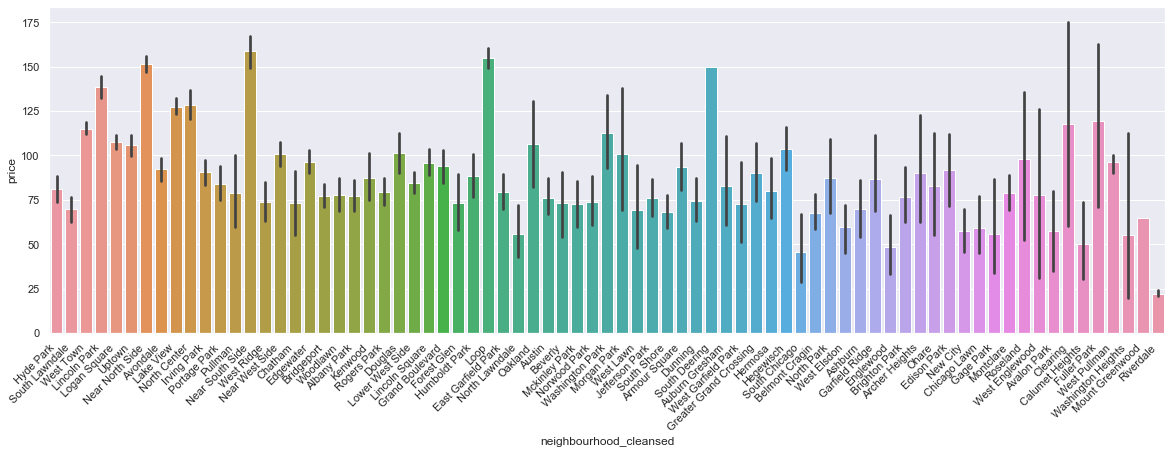

In [466]:
# Bar plot 
sort_price = listings.loc[(listings.price <= 250) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(20,6))
ax=sns.barplot(data= l2,x='neighbourhood_cleansed',y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

## Review score rating of accomodations

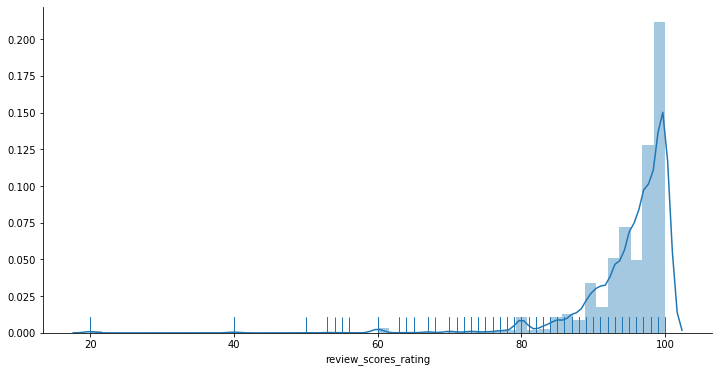

In [407]:
plt.figure(figsize=(12,6))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show()

In [408]:
listings.review_scores_rating.describe()

count    7665.000000
mean       95.073581
std         6.940476
min        20.000000
25%        93.000000
50%        97.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

In [409]:
listings.price.head()

0     $50.00
1    $117.00
2     $80.00
3    $150.00
4    $215.00
Name: price, dtype: object

### Removing the $ sign from price

In [410]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)

listings['price'].describe()

count     8852.000000
mean       175.974243
std        393.087429
min          0.000000
25%         69.000000
50%        109.000000
75%        186.000000
max      10000.000000
Name: price, dtype: float64

In [411]:
list1= listings ## storing values of listings 

## The most expensive Airbnb listing in Chicago is at $10000/night

In [412]:
listings.iloc[np.argmax(listings['price'])]

id                                                                                       13734253
listing_url                                                 https://www.airbnb.com/rooms/13734253
scrape_id                                                                          20190922191701
last_scraped                                                                           2019-09-22
name                                            PERFECT OLD TOWN LOCATION FOR GROUPS - SLEEPS 12!
summary                                         Unbelievable location in Old Town with tons of...
space                                           It is a single floor unit with the absolute be...
description                                     Unbelievable location in Old Town with tons of...
experiences_offered                                                                          none
neighborhood_overview                           OLD TOWN! An incredibly popular neighborhood d...
notes               

In [413]:
listings.loc[listings['price'] == 0]['price'].count()

1

### There is one listing with 0 price

In [414]:
l1=listings

In [415]:
l1.shape

(8852, 106)

### As mean price was around 175. Removing outlier values (price 0 and price more than 250)

In [416]:
l2= listings[(listings['price'] > 0) & (listings['price'] <=250) ]
l2['price'].describe()

count    7605.000000
mean      108.032873
std        58.701901
min        10.000000
25%        60.000000
50%        99.000000
75%       149.000000
max       250.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Histogram of listing prices')

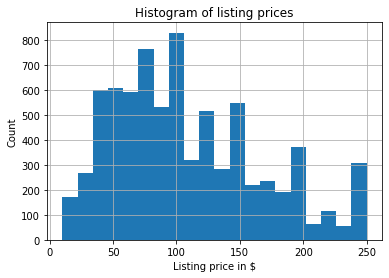

In [417]:
## plotting accomadoations with price between 0 and 250 $
listings.loc[(listings.price <= 250) &(listings.price > 0)].price.hist(bins=20)
plt.ylabel('Count')
plt.xlabel('Listing price in $')
plt.title('Histogram of listing prices')

## Property_type vs price

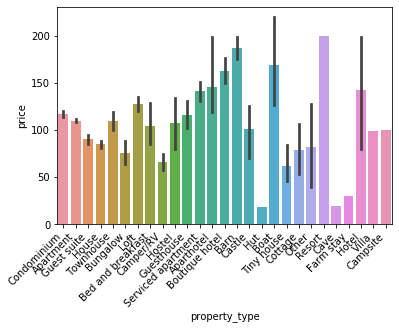

In [419]:
# Bar plot 
sort_price = listings.loc[(listings.price <= 250) & (listings.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
ax=sns.barplot(data= l2,x='property_type',y='price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

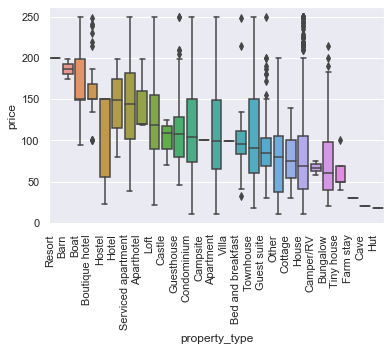

In [462]:
# Box plot
sortprice = listings.loc[(listings.price <= 250) & (listings.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.loc[(listings.price <= 250) & (listings.price > 0)], order=sortprice)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

In [422]:
l2.property_type.value_counts()

Apartment             4543
Condominium           1150
House                  985
Townhouse              194
Loft                   186
Guest suite            183
Serviced apartment     137
Bungalow                70
Guesthouse              50
Boutique hotel          31
Bed and breakfast       19
Hostel                  14
Other                    7
Cottage                  7
Tiny house               5
Boat                     5
Aparthotel               3
Hotel                    3
Castle                   3
Camper/RV                2
Barn                     2
Resort                   1
Cave                     1
Campsite                 1
Hut                      1
Villa                    1
Farm stay                1
Name: property_type, dtype: int64

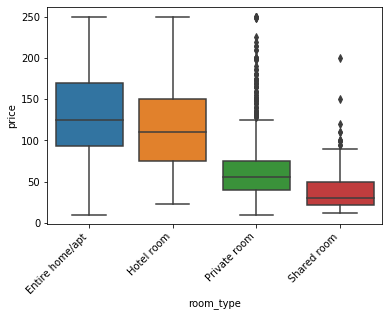

In [424]:
### roomtype vs price of properties having price below 20$
sort_price = listings.loc[(listings.price <= 250) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 250) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

Text(0.5, 0, 'Listing price in $')

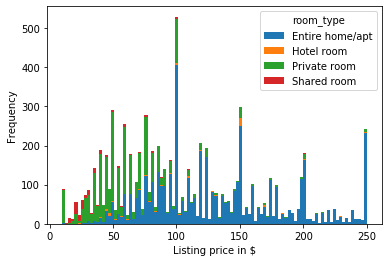

In [425]:
listings.loc[(listings.price <= 250) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.xlabel('Listing price in $')

In [426]:
l2.amenities.head()

0    {TV,Wifi,Kitchen,Breakfast,"Free street parkin...
1    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
2    {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
3    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
4    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
Name: amenities, dtype: object

In [427]:
l2.amenities = l2.amenities.str.replace("[{}]", "").str.replace('"', "") ## replacing {} by ''

In [428]:
l2.amenities.head()

0    TV,Wifi,Kitchen,Breakfast,Free street parking,...
1    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
2    TV,Internet,Wifi,Air conditioning,Kitchen,Free...
3    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
4    TV,Cable TV,Internet,Wifi,Air conditioning,Kit...
Name: amenities, dtype: object

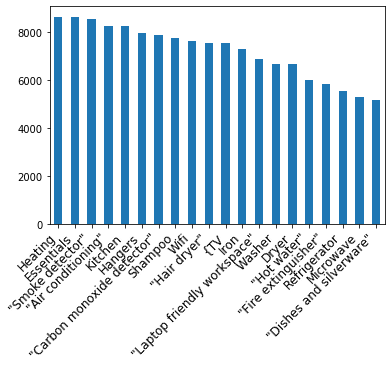

In [429]:
pd.Series(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(20)\
    .plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show()

## Exploring features

### Heatmap to explore features like number of bathrooms, bedrooms

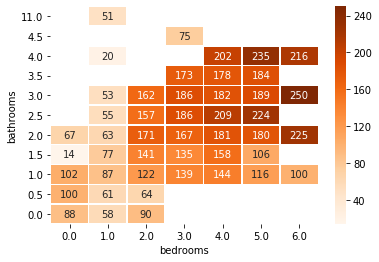

In [430]:
sns.heatmap(listings.loc[(listings.price > 0)&(listings.price <= 250)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.show()

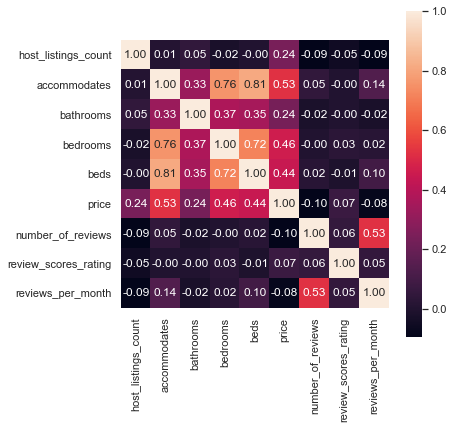

In [431]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
corr = listings.loc[(listings.price <= 250) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (6,6))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show()

In [432]:
l2['price'] = l2['price'].astype(float)

l2.shape

(7605, 106)

In [433]:
list_final= l2[l2['price'] > 0]

In [434]:
### replacing t, f by 1, 0

columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']

for c in columns:
    list_final[c] = list_final[c].replace('f',0,regex=True)
    list_final[c] = list_final[c].replace('t',1,regex=True)

In [435]:
list_final['security_deposit'] = list_final['security_deposit'].fillna(value=0)
list_final['security_deposit'] = list_final['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
list_final['cleaning_fee'] = list_final['cleaning_fee'].fillna(value=0)
list_final['cleaning_fee'] = list_final['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)

In [436]:
features = list_final[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]

In [437]:
for column in features:
    if features[column].isnull().any():
        print(column)

bathrooms
bedrooms
review_scores_rating


In [438]:

features['bathrooms']=features['bathrooms'].fillna((features['bathrooms'].median()))
features['bedrooms']=features['bedrooms'].fillna((features['bedrooms'].median()))
features['review_scores_rating']=features['review_scores_rating'].fillna((features['review_scores_rating'].median()))

In [439]:
#for col in features.columns[features.isnull().any()]:
 #   print(col)
for column in features:
    if features[column].isnull().any():
        print(column)

## Handling categorical values

In [440]:
for cat_feature in ['property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    features = pd.concat([features, pd.get_dummies(list_final[cat_feature])], axis=1)
  

In [441]:
features.columns

Index(['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
       'is_location_exact', 'requires_license', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'security_deposit', 'cleaning_fee',
       ...
       'West Lawn', 'West Pullman', 'West Ridge', 'West Town', 'Woodlawn',
       'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed'],
      dtype='object', length=136)

In [442]:
f1= features 

In [443]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(list_final['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())

In [444]:
features = pd.concat([features, df_amenities], axis=1, join='inner')

In [445]:
features.shape

(6586, 320)

In [446]:
y = features['price']
X = features

In [447]:
X.drop(['price'],axis=1,inplace= True)

print(X.shape, y.shape)

(6586, 319) (6586,)


In [448]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(X_train.shape, X_test.shape)


(5268, 319) (1318, 319)


In [449]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [450]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [451]:
model.intercept_

29.975365626003295

In [452]:
#Prediction
yhat_test=model.predict(X_test)

In [453]:
#Score/Accuracy
print("Accuracy --> ", model.score(X_test, y_test)*100)
print(model.score(X,y))

Accuracy -->  54.10728360510062
0.5836944917072064


In [454]:
print("Predicted values:", yhat_test[0:10])
print("True values:", y_test[0:10].values)

Predicted values: [ 47.92438675 147.31123031 167.98022467  68.73305221 135.10554389
  55.90738175 120.7101612  117.60973859  93.11306793  71.80663669]
True values: [ 50. 149. 183.  85. 175.  50. 180. 100.  40.  95.]


In [455]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, yhat_test)))

39.52743782135698


### Modeling using Random Forest Regressor

In [456]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [457]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.1, random_state=4)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=4, 
                               n_jobs=-1)
rf.fit(Xtrain, ytrain)
ytrain_pred = rf.predict(Xtrain)
ytest_pred = rf.predict(Xtest)
rmse_rf= (mean_squared_error(ytest,ytest_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(ytest, ytest_pred)))

RMSE test: 37.444
R^2 test: 0.627


## Ridge Model

In [458]:
from sklearn.linear_model import Ridge
RidgeModel= Ridge(alpha =0.5)
#RidgeModel.fit(X_train,y_train)
#RidgeModel.score(X_test,y_test)
RidgeModel.fit(Xtrain,ytrain)
RidgeModel.score(Xtest,ytest)

0.5627088181279468

In [460]:
from sklearn.linear_model import  Lasso
# Lasso
reg = Lasso()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
rmse_train = mean_squared_error(y_train, y_train_pred) ** (0.5)
rmse_test = mean_squared_error(y_test, y_test_pred) ** (0.5)
print(f"Training error: {rmse_train}")
print(f"Testing error: {rmse_test}")

Training error: 41.647662926365015
Testing error: 42.94891129139106


In [467]:
reg.score(Xtest,ytest)

0.47268596512537125